# Logistic Regression Project
 In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('data/advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [6]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [7]:
df=df.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)

In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Doing EDA on data!

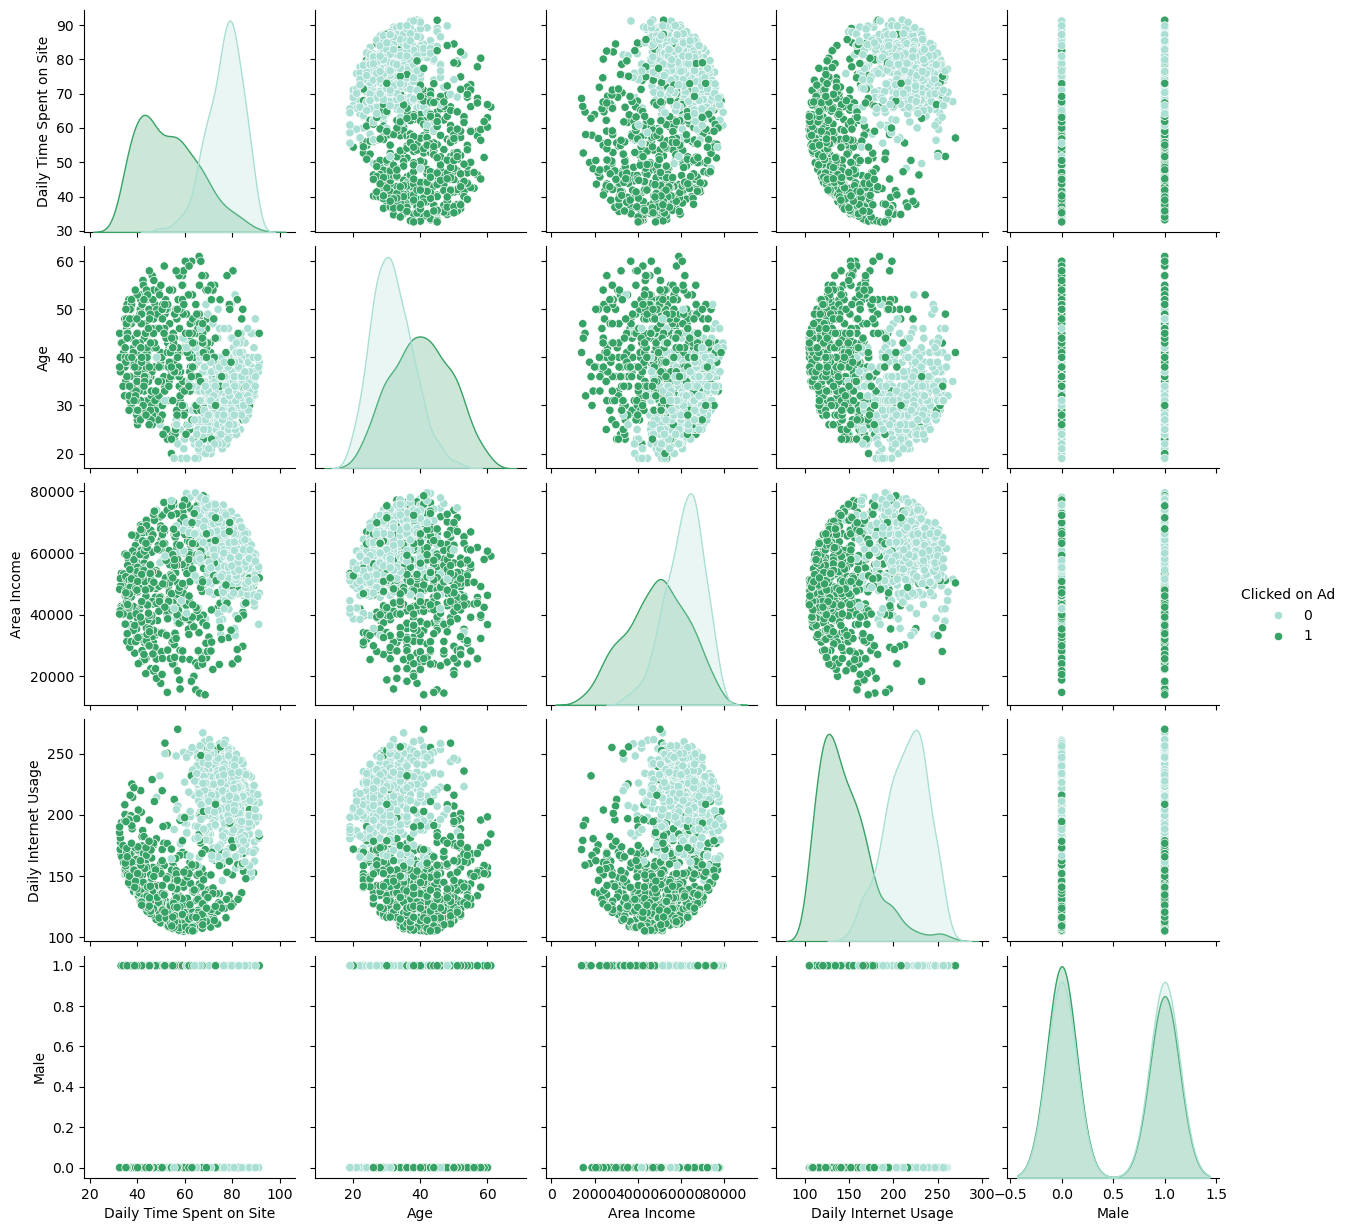

In [10]:
sns.pairplot(df,hue='Clicked on Ad',palette='BuGn')


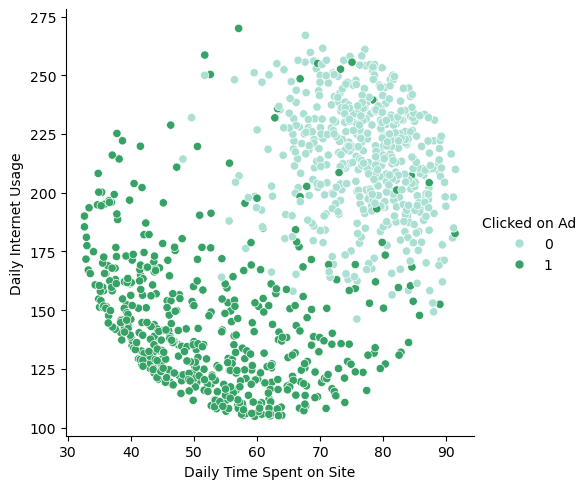

In [11]:
sns.relplot(df,y='Daily Internet Usage',x='Daily Time Spent on Site',hue='Clicked on Ad',palette="BuGn") 

<Axes: xlabel='Clicked on Ad', ylabel='count'>

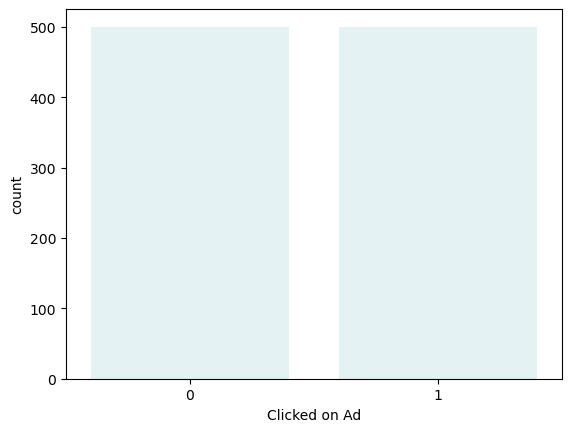

In [12]:
sns.set_palette('BuGn')
sns.countplot(data=df,x='Clicked on Ad')

<Axes: xlabel='Age', ylabel='Count'>

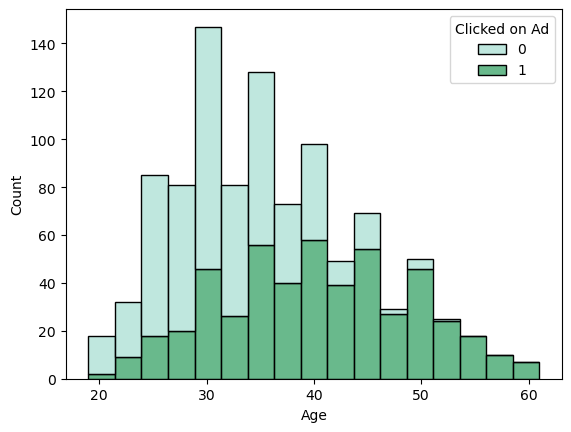

In [13]:
sns.histplot(df,x='Age',hue='Clicked on Ad',palette='BuGn',multiple='stack')

In [14]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


## Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [9]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [15]:
num_features = [
    'Daily Time Spent on Site',
    'Age',
    'Area Income',
    'Daily Internet Usage'
]

cat_features = ['Male']

scaler=StandardScaler()

preprocessor=ColumnTransformer(
    transformers=[
        ('num',scaler,num_features),
        ('cat','passthrough',cat_features)])

model=Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('training',LogisticRegression())])


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
model.fit(X_train,Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Daily Time Spent on Site',
                                                   'Age', 'Area Income',
                                                   'Daily Internet Usage']),
                                                 ('cat', 'passthrough',
                                                  ['Male'])])),
                ('training', LogisticRegression())])

In [21]:
y_pred=model.predict(X_test)

In [22]:
score=accuracy_score(Y_test,y_pred)
score

0.96

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        89
           1       0.97      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

[[ 86   3]
 [  5 106]]
